# The Legendary Accident - Sinking of the Unskinkable

We all know the historic event on 15th April 1912 of the unsnikable ship that sniked due to an unaviodable iceberg during her maiden voyage from Southamptom, UK. Having estimated 2224 people onboard out of which 1502 died.

Though the survival of the people can be said pure luck, but we have to find any group of people more likely to survive than other.


We should start with importing the required libraries for the EDA and data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
titanic_df = pd.read_csv("train.csv",index_col=0)

titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# EDA

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Data consist of 11 columns

1. Survied - status of survival of individual (binary) No=0, yes=1
2. Pclass - Ticket class (int) 1 =first, 2 = second, 3= third
3. Name - Name of the individual
4. Sex - gender (male, female)
5. Age - Age of the individual (int)
6. Sibsp - No. of siblings / spouses aboard the Titanic (int)
7. Parch - No. of parents / children aboard the Titanic (int)
8. Ticket - Ticket number
9. Fare - Passenger fare
10. Cabin - Cabin number
11. Embarked - Port of Embarkation (S = Southampton, C = Cherbourg, Q = Queenstown)

We have to get rid of reduntant features that would not effect on the survival like Name, Ticket, Fare, Cabin, Embarked but first have to change the class to words

In [5]:
Pclass_dic = {
    1:'first',
    2:'second',
    3:'third'
}

In [6]:
titanic_df.Pclass = titanic_df.Pclass.map(lambda clas: Pclass_dic.get(clas))

In [7]:
titanic_new = titanic_df.drop(columns=['Name','Ticket','Fare','Cabin','Embarked']) 

titanic_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,third,male,22.0,1,0
2,1,first,female,38.0,1,0
3,1,third,female,26.0,0,0
4,1,first,female,35.0,1,0
5,0,third,male,35.0,0,0


It would be better if we aggregate the number of siblings/spouses and parents/children and make a single feature as people would have been in group.

In [8]:
titanic_new['relations'] = titanic_new.SibSp + titanic_new.Parch

titanic_new.drop(columns=['SibSp','Parch'],inplace=True)

titanic_new.head()

,Survived,Pclass,Sex,Age,relations
PassengerId,,,,,
1,0,third,male,22.0,1
2,1,first,female,38.0,1
3,1,third,female,26.0,0
4,1,first,female,35.0,1
5,0,third,male,35.0,0


## Descriptive statistic of the data

In [9]:
titanic_new.describe()

,Survived,Age,relations
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,0.904602
std,0.486592,14.526497,1.613459
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,0.000000
50%,0.000000,28.000000,0.000000
75%,1.000000,38.000000,1.000000
max,1.000000,80.000000,10.000000


In [10]:
shape = titanic_new.shape

shape

(891, 5)

Age has some missing values and aslo the Survived data seems skewed.

<AxesSubplot:>

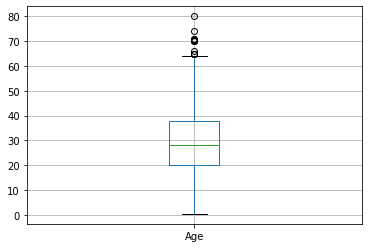

In [11]:
titanic_new.boxplot('Age')

In [12]:
print("No of null values: ",titanic_new.Age.isnull().sum())

print("% of null values: ",titanic_new.Age.isnull().sum()/shape[0])

No of null values:  177
% of null values:  0.19865319865319866


Let's see the null values with the name

In [13]:
pd.set_option('display.max_rows',None)
titanic_df[titanic_df.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,third,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,second,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,third,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,third,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,third,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,0,third,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
32,1,first,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
33,1,third,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,1,third,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


In [14]:
titanic_df['Salutation'] = titanic_df.Name.str.extract(r'(\b[A-Z][a-z]+\.)')

titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
PassengerId,,,,,,,,,,,,
1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [15]:
titanic_df.Salutation.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [16]:
titanic_df.Salutation.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Salutation, dtype: int64

In [17]:
titanic_df[titanic_df.Age.notnull()].Salutation.value_counts()

Mr.          398
Miss.        146
Mrs.         108
Master.       36
Rev.           6
Dr.            6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Salutation, dtype: int64

would have deleted Don., Jonkheer, Countees, Sir. And, mergered (mme,Mlle, Ms, Miss) as they are referring to same term but there is no missing data in the above mentioned values. hence, no data wrangling required here.

In [18]:
salutation_age_med = dict(titanic_df[titanic_df.Age.notnull()].groupby(by = 'Salutation')['Age'].median())

salutation_age_med

{'Capt.': 70.0,
 'Col.': 58.0,
 'Countess.': 33.0,
 'Don.': 40.0,
 'Dr.': 46.5,
 'Jonkheer.': 38.0,
 'Lady.': 48.0,
 'Major.': 48.5,
 'Master.': 3.5,
 'Miss.': 21.0,
 'Mlle.': 24.0,
 'Mme.': 24.0,
 'Mr.': 30.0,
 'Mrs.': 35.0,
 'Ms.': 28.0,
 'Rev.': 46.5,
 'Sir.': 49.0}

Replacing null values respective to the salutation

In [19]:
titanic_df2 = titanic_df.copy()

In [20]:
titanic_df2.loc[titanic_df2.Age.isna(), 'Age'] = titanic_df2[titanic_df2.Age.isna()].Salutation.map(lambda salutation: int(salutation_age_med.get(salutation)))

In [21]:
titanic_new[titanic_new.Age.isnull()].Sex.value_counts()/titanic_new.Age.isnull().sum()

male      0.700565
female    0.299435
Name: Sex, dtype: float64

In [22]:
titanic_new.Sex.value_counts()/shape[0]

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Because the Age has some outliers it would be better to replace the missing values with the median of the different salutuion, but also making a set without the null vlaues 

In [23]:
titanic_new2 = titanic_new.dropna()

titanic_new2.shape

(714, 5)

Dataframe with the replaced values

In [24]:
titanic_new_w = titanic_df2.drop(columns=['Name','Ticket','Fare','Cabin','Embarked','Salutation'])

titanic_new_w['relations'] = titanic_new_w.SibSp + titanic_new_w.Parch

titanic_new_w.drop(columns=['SibSp','Parch'],inplace=True)

# Visualization

looking for the skewed data

<AxesSubplot:xlabel='Survived', ylabel='count'>

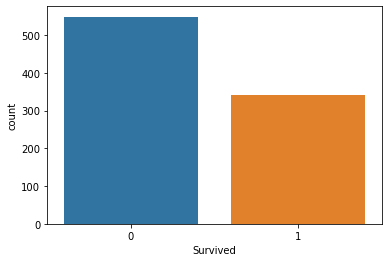

In [25]:
sns.countplot(x='Survived',data=titanic_new)

In [26]:
titanic_new.Survived.value_counts()/shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

The data is highly imbalanced we have to take this in consideration while building the model

### Distribution with respect to class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

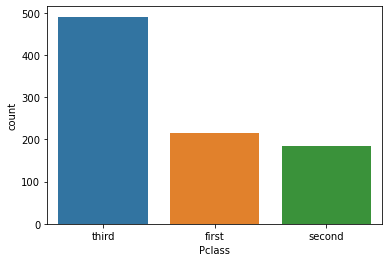

In [27]:
sns.countplot(x='Pclass', data= titanic_new)

### With respect to Age

drop the null rows

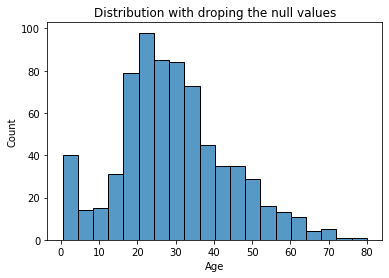

In [28]:
sns.histplot(x="Age",data=titanic_new2)
plt.title('Distribution with droping the null values')
plt.show()

with replaced null values

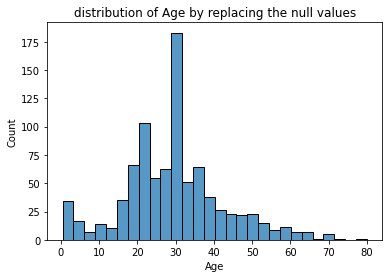

In [29]:
sns.histplot(x="Age",data=titanic_new_w)
plt.title('distribution of Age by replacing the null values')
plt.show()

We can observe that after dropping the data is well distributed but we missed out 20% of the data, so here we keep both the data and decide after the model is created depending on the error score

### Respect to sex

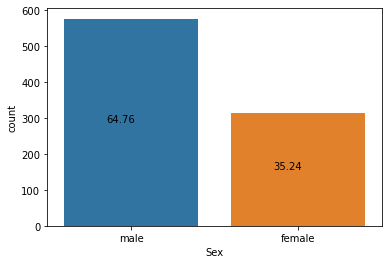

In [30]:
ax=sns.countplot(x='Sex',data=titanic_new)
for p in ax.patches:
    ax.annotate('{:.2f}'.format((p.get_height()/sum([p.get_height() for p in ax.patches]))*100),(p.get_x()+.25,p.get_height()*.5))
plt.show()

**the data is skewed for Sex, class and survival**

will make dummy features for the class as it would be easy to compute and gieve better results than the label encoding that will be using for the Sex


# Feature Engineering

### Label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# for replaced values

Encoder_w = LabelEncoder()

titanic_new_w.Sex = Encoder_w.fit_transform(titanic_new_w.Sex)

titanic_new_w.head()

,Survived,Pclass,Sex,Age,relations
PassengerId,,,,,
1,0,third,1,22.0,1
2,1,first,0,38.0,1
3,1,third,0,26.0,0
4,1,first,0,35.0,1
5,0,third,1,35.0,0


comparing the datasets can say that male =1 , female = 0

In [33]:
# for droped null values

Encoder_wo = LabelEncoder()

titanic_new2.Sex = Encoder_wo.fit_transform(titanic_new2.Sex)

titanic_new2.head()

,Survived,Pclass,Sex,Age,relations
PassengerId,,,,,
1,0,third,1,22.0,1
2,1,first,0,38.0,1
3,1,third,0,26.0,0
4,1,first,0,35.0,1
5,0,third,1,35.0,0


# Pairplot

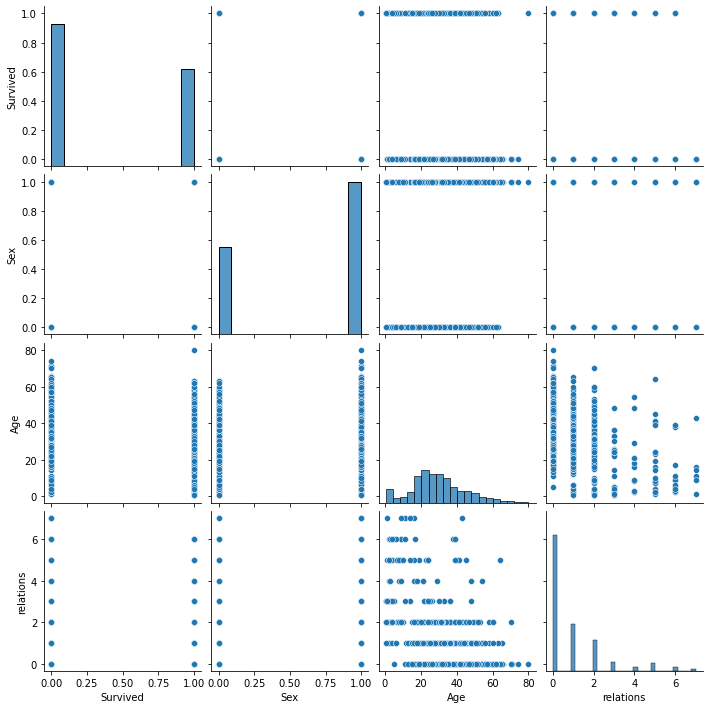

In [34]:
sns.pairplot(data=titanic_new2)

# Correlation

<AxesSubplot:>

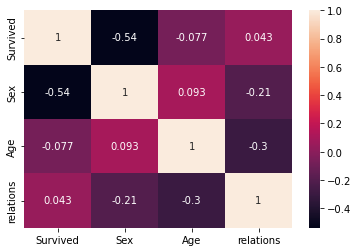

In [35]:
sns.heatmap(data=titanic_new2.corr(),annot=True)

for this set to male =1 and female = 0

### Creating dummy variables for class

In [36]:
titanic_new_dum = pd.get_dummies(titanic_new2)

titanic_new_dum.head()

,Survived,Sex,Age,relations,Pclass_first,Pclass_second,Pclass_third
PassengerId,,,,,,,
1,0,1,22.0,1,0,0,1
2,1,0,38.0,1,1,0,0
3,1,0,26.0,0,0,0,1
4,1,0,35.0,1,1,0,0
5,0,1,35.0,0,0,0,1


In [37]:
titanic_w_dum = pd.get_dummies(titanic_new_w)

titanic_w_dum.head()

,Survived,Sex,Age,relations,Pclass_first,Pclass_second,Pclass_third
PassengerId,,,,,,,
1,0,1,22.0,1,0,0,1
2,1,0,38.0,1,1,0,0
3,1,0,26.0,0,0,0,1
4,1,0,35.0,1,1,0,0
5,0,1,35.0,0,0,0,1


Spliting data before scalling

In [38]:
from sklearn.model_selection import train_test_split

X_wo = titanic_new_dum.iloc[:,1:].copy()
y_wo = titanic_new_dum.Survived.copy()

X_w = titanic_w_dum.iloc[:,1:].copy()
y_w = titanic_w_dum.Survived.copy()

In [39]:
# spliting with respect to Sex and Survival as data needs to be equally distributed
X_train_wo, X_test_wo,y_train_wo, y_test_wo = train_test_split(X_wo,pd.concat([y_wo,X_wo['Sex']],axis=1),test_size=.20,stratify=pd.concat([y_wo,X_wo['Sex']],axis=1),random_state=90)

y_train_wo.drop(columns='Sex',inplace=True)
y_test_wo.drop(columns='Sex',inplace=True)

X_train_w, X_test_w,y_train_w, y_test_w = train_test_split(X_w,pd.concat([y_w,X_w['Sex']],axis=1),test_size=.20,stratify=pd.concat([y_w,X_w['Sex']],axis=1),random_state=90)
y_train_w.drop(columns='Sex',inplace=True)
y_test_w.drop(columns='Sex',inplace=True)


### Feature Scalling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scale_wo = StandardScaler(with_std=True)

X_wotrain_scale = scale_wo.fit_transform(X_train_wo)

X_wotest_scale = scale_wo.transform(X_test_wo)

scale_w = StandardScaler(with_std=True)

X_wtrain_scale = scale_w.fit_transform(X_train_w)

X_wtest_scale = scale_w.transform(X_test_w)

In [42]:
X_wotrain_scale

array([[ 0.75983424,  0.4159398 ,  0.03274377,  1.66029484, -0.57532802,
        -0.97065796],
       [-1.31607652, -0.46795669, -0.63499522, -0.60230266, -0.57532802,
         1.03022902],
       [-1.31607652, -0.39996465,  0.03274377, -0.60230266, -0.57532802,
         1.03022902],
       ...,
       [-1.31607652, -0.80791688,  0.70048275,  1.66029484, -0.57532802,
        -0.97065796],
       [ 0.75983424,  1.09586019,  0.03274377,  1.66029484, -0.57532802,
        -0.97065796],
       [-1.31607652, -0.87590892,  3.37143869, -0.60230266, -0.57532802,
         1.03022902]])

## Correlation matrix

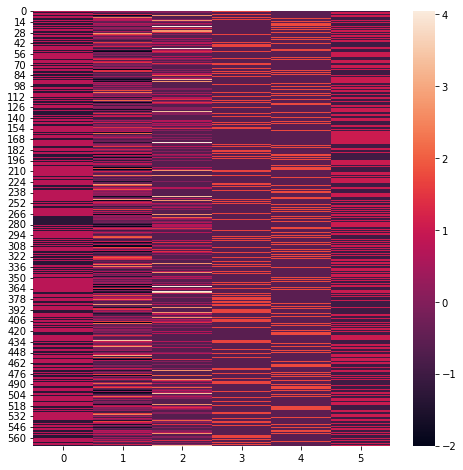

In [43]:
plt.figure(figsize=[8,8])
sns.heatmap(data=X_wotrain_scale)
plt.show()

# Model Creation

importing libraries

In [44]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

# KNN Classifier

first we will see which dataset works better

In [45]:
def optimal_KNN(Xtrain,Xtest,ytrain, ytest,neighs):
    score_df = pd.DataFrame(columns=["neighbour","test_score","train_score"])
    for neigh in range(1,neighs,2):
        kn_model = KNeighborsClassifier(n_neighbors=neigh)
        kn_model.fit(Xtrain,ytrain)
        score_df = score_df.append({"neighbour":neigh,"test_score":kn_model.score(Xtest,ytest),"train_score":kn_model.score(Xtrain,ytrain)},ignore_index=True)
        print ("+",end="")
    print("Complete")
    return score_df

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++Complete


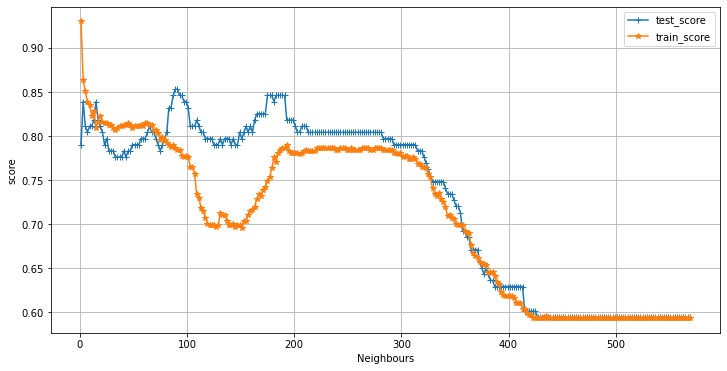

In [46]:
wo_df = optimal_KNN(X_wotrain_scale,X_wotest_scale,y_train_wo,y_test_wo,len(y_train_wo))

plt.figure(figsize=[12,6])
plt.plot(wo_df.neighbour,wo_df.test_score,marker='+',label="test_score")
plt.plot(wo_df.neighbour,wo_df.train_score,marker='*',label="train_score")
plt.xlabel("Neighbours")
plt.ylabel("score")
plt.legend()
plt.grid()
plt.show()

In [47]:
wo_df[wo_df.test_score == wo_df.test_score.max()]

,neighbour,test_score,train_score
44,89.0,0.853147,0.786340
45,91.0,0.853147,0.784588


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++Complete


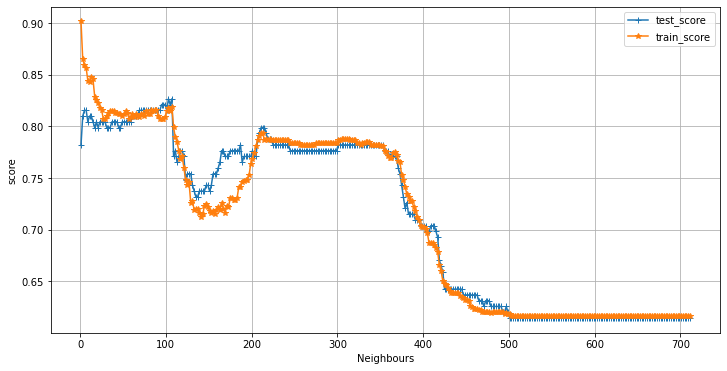

In [48]:
# trying with the replaced features

w_df = optimal_KNN(X_wtrain_scale,X_wtest_scale,y_train_w,y_test_w,len(y_train_w))

plt.figure(figsize=[12,6])
plt.plot(w_df.neighbour,w_df.test_score,marker='+',label="test_score")
plt.plot(w_df.neighbour,w_df.train_score,marker='*',label="train_score")
plt.xlabel("Neighbours")
plt.ylabel("score")
plt.legend()
plt.grid()
plt.show()

In [49]:
w_df[w_df.test_score == w_df.test_score.max()]

,neighbour,test_score,train_score
51,103.0,0.826816,0.817416
53,107.0,0.826816,0.818820


# Decision Tree

In [50]:
dtwo_model = DecisionTreeClassifier(random_state=42)

dtwo_model.fit(X_wotrain_scale,y_train_wo)

print(f"Decision tree test score : {dtwo_model.score(X_wotest_scale,y_test_wo)}, \n Decision tree train score : {dtwo_model.score(X_wotrain_scale,y_train_wo)}")

Decision tree test score : 0.7762237762237763, 
 Decision tree train score : 0.9387040280210157


In [51]:
dtw_model = DecisionTreeClassifier(random_state=42)

dtw_model.fit(X_wtrain_scale,y_train_w)

print(f"Decision tree test score : {dtw_model.score(X_wtest_scale,y_test_w)}, \
      \n Decision tree train score : {dtw_model.score(X_wtrain_scale,y_train_w)}")

Decision tree test score : 0.7932960893854749,       
 Decision tree train score : 0.9185393258426966


# Evaluation

### Confusion matrix for the KNN algorithm

In [52]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [53]:
# using wo dataset using 89 neighbours

knwo_model = KNeighborsClassifier(n_neighbors=89)

knwo_model.fit(X_wotrain_scale,y_train_wo)

wo_y_pred = knwo_model.predict(X_wotest_scale)

In [54]:
print(f"Precision Score: {precision_score(y_test_wo,wo_y_pred)},\
\nRecall Score: {recall_score(y_test_wo,wo_y_pred)},\
\nF1 Score: {f1_score(y_test_wo,wo_y_pred)},\
\nConfusion Matrix: \n{confusion_matrix(y_test_wo,wo_y_pred)}")

Precision Score: 0.9743589743589743,
Recall Score: 0.6551724137931034,
F1 Score: 0.7835051546391754,
Confusion Matrix: 
[[84  1]
 [20 38]]


In [55]:
# using w dataset using 103 neighbours

knw_model = KNeighborsClassifier(n_neighbors=103)

knw_model.fit(X_wtrain_scale,y_train_w)

w_y_pred = knw_model.predict(X_wtest_scale)

In [56]:
print(f"Precision Score: {precision_score(y_test_w,w_y_pred)},\
\nRecall Score: {recall_score(y_test_w,w_y_pred)},\
\nF1 Score: {f1_score(y_test_w,w_y_pred)},\
\nConfusion Matrix: \n{confusion_matrix(y_test_w,w_y_pred)}")

Precision Score: 0.8653846153846154,
Recall Score: 0.6521739130434783,
F1 Score: 0.743801652892562,
Confusion Matrix: 
[[103   7]
 [ 24  45]]


**We are getting good results from the dataset with the dropped rows.** So, here foward will use the dataset with the dropped rows ie. wo

We should check for another algorithms if they give us better results

## Random Forest Classifier

In [57]:
def optimal_rf(Xtrain,Xtest,ytrain, ytest,trees):
    score_df = pd.DataFrame(columns=["trees","test_score","train_score"])
    for estimator in trees:
        model = RandomForestClassifier(n_estimators=estimator,random_state=42)
        model.fit(Xtrain,ytrain)
        score_df = score_df.append({"trees":estimator,"test_score":model.score(Xtest,ytest),"train_score":model.score(Xtrain,ytrain)},ignore_index=True)
        print ("+",end="")
    print("Complete")
    return score_df    

+++++++++Complete


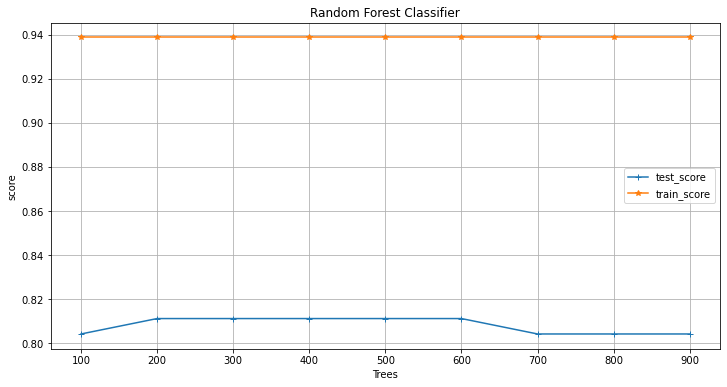

In [58]:
df = optimal_rf(X_wotrain_scale,X_wotest_scale,y_train_wo,y_test_wo,range(100,1000,100))

plt.figure(figsize=[12,6])
plt.plot(df.trees,df.test_score,marker='+',label="test_score")
plt.plot(df.trees,df.train_score,marker='*',label="train_score")
plt.xlabel("Trees")
plt.ylabel("score")
plt.legend()
plt.title("Random Forest Classifier")
plt.grid()
plt.show()

There is no point in moving forward with Random forest classifier

## Gradient Boosting Classifier

In [59]:
def optimal_gb(Xtrain,Xtest,ytrain, ytest,trees):
    score_df = pd.DataFrame(columns=["trees","test_score","train_score"])
    for estimator in trees:
        model = GradientBoostingClassifier(n_estimators=estimator,random_state=42)
        model.fit(Xtrain,ytrain)
        score_df = score_df.append({"trees":estimator,"test_score":model.score(Xtest,ytest),"train_score":model.score(Xtrain,ytrain)},ignore_index=True)
        print ("*",end="")
    print("Complete")
    return score_df

**************************************Complete


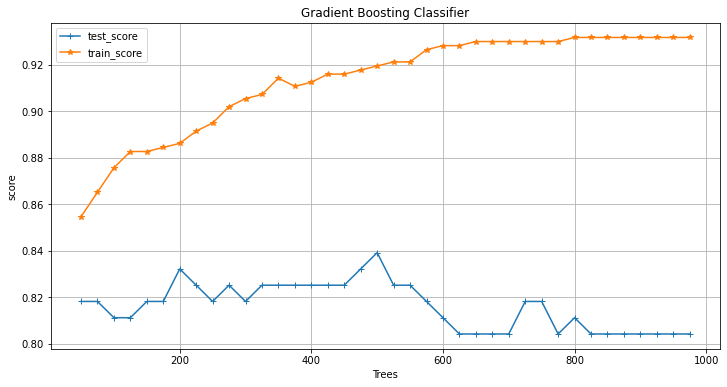

In [60]:
df = optimal_gb(X_wotrain_scale,X_wotest_scale,y_train_wo,y_test_wo,range(50,1000,25))

plt.figure(figsize=[12,6])
plt.plot(df.trees,df.test_score,marker='+',label="test_score")
plt.plot(df.trees,df.train_score,marker='*',label="train_score")
plt.xlabel("Trees")
plt.ylabel("score")
plt.legend()
plt.title("Gradient Boosting Classifier")
plt.grid()
plt.show()

Gradient Boosting worked good and can be considered for the final model

## XGB Classifier

In [61]:
def optimal_xg(Xtrain,Xtest,ytrain, ytest,trees):
    score_df = pd.DataFrame(columns=["trees","test_score","train_score"])
    for estimator in trees:
        model = XGBClassifier(n_estimators=estimator,use_label_encoder=False,random_state=42)
        model.fit(Xtrain,ytrain,eval_metric='aucpr')
        score_df = score_df.append({"trees":estimator,"test_score":model.score(Xtest,ytest),"train_score":model.score(Xtrain,ytrain)},ignore_index=True)
        print ("*",end="")
    print("Complete")
    return score_df

**************************************Complete


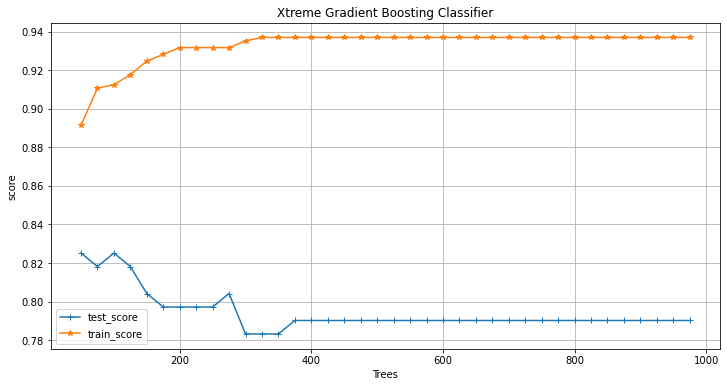

In [62]:
df = optimal_xg(X_wotrain_scale,X_wotest_scale,y_train_wo,y_test_wo,range(50,1000,25))

plt.figure(figsize=[12,6])
plt.plot(df.trees,df.test_score,marker='+',label="test_score")
plt.plot(df.trees,df.train_score,marker='*',label="train_score")
plt.xlabel("Trees")
plt.ylabel("score")
plt.legend()
plt.title("Xtreme Gradient Boosting Classifier")
plt.grid()
plt.show()

Let's try with Adaboost if it gives better results

## AdaBoost

In [63]:
def optimal_ad(Xtrain,Xtest,ytrain, ytest,trees):
    score_df = pd.DataFrame(columns=["trees","test_score","train_score"])
    for estimator in trees:
        model = AdaBoostClassifier(n_estimators=estimator,random_state=42)
        model.fit(Xtrain,ytrain)
        score_df = score_df.append({"trees":estimator,"test_score":model.score(Xtest,ytest),"train_score":model.score(Xtrain,ytrain)},ignore_index=True)
        print ("*",end="")
    print("Complete")
    return score_df

**************************************Complete


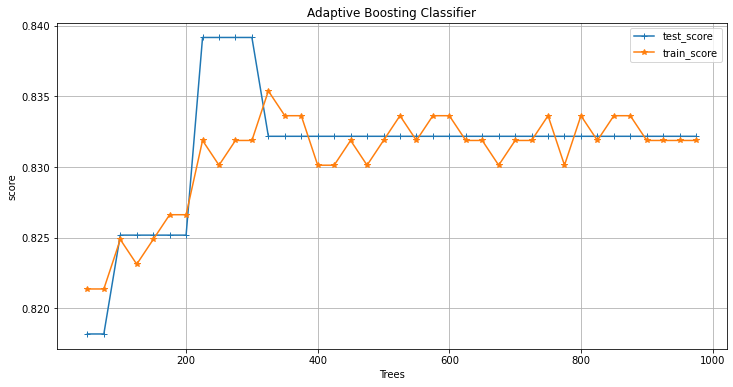

In [64]:
df = optimal_ad(X_wotrain_scale,X_wotest_scale,y_train_wo,y_test_wo,range(50,1000,25))

plt.figure(figsize=[12,6])
plt.plot(df.trees,df.test_score,marker='+',label="test_score")
plt.plot(df.trees,df.train_score,marker='*',label="train_score")
plt.xlabel("Trees")
plt.ylabel("score")
plt.legend()
plt.title("Adaptive Boosting Classifier")
plt.grid()
plt.show()

In [65]:
# using ADABoost with 250 estimators

ad_model = AdaBoostClassifier(n_estimators=250,random_state=42)

ad_model.fit(X_wotrain_scale,y_train_wo)

pred_y = ad_model.predict(X_wotest_scale)

# Evaluation

In [66]:
print(f"Precision Score: {precision_score(y_test_wo,wo_y_pred)},\
\nRecall Score: {recall_score(y_test_wo,wo_y_pred)},\
\nF1 Score: {f1_score(y_test_wo,wo_y_pred)},\
\nConfusion Matrix: \n{confusion_matrix(y_test_wo,wo_y_pred)},\
\ntest Score: {ad_model.score(X_wotest_scale,y_test_wo)} ")

Precision Score: 0.9743589743589743,
Recall Score: 0.6551724137931034,
F1 Score: 0.7835051546391754,
Confusion Matrix: 
[[84  1]
 [20 38]],
test Score: 0.8391608391608392 


## from above models we can make decision to use the ADAboost Classifier as the algorithm niether Overfits also has accuracy close to our best model (KNN Classifier)

Building final model

In [70]:
# Scaling the features 

scale = StandardScaler(with_std=True)

X_scale = scale.fit_transform(X_wo)

In [68]:
final_model = AdaBoostClassifier(n_estimators=250, random_state=42)


In [71]:
final_model.fit(X_scale,y_wo)

AdaBoostClassifier(n_estimators=250, random_state=42)

# Our Model is ready and now we can predict for the test data 

Importing test dataset

In [86]:
titanic_test = pd.read_csv('test.csv',index_col=0)

titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA and feature engineering on test data

In [87]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [88]:
titanic_test['Salutation'] = titanic_test.Name.str.extract(r'(\b[A-Z][a-z]+\.)')

In [89]:
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


In [90]:
titanic_test.where(titanic_test.Age.isnull()).Salutation.value_counts()

Mr.        57
Miss.      14
Mrs.       10
Master.     4
Ms.         1
Name: Salutation, dtype: int64

In [91]:
titanic_test.Salutation = titanic_test.Salutation.str.replace('Ms','Miss')

In [92]:
titanic_test.where(titanic_test.Age.isnull()).Salutation.value_counts()

Mr.        57
Miss.      15
Mrs.       10
Master.     4
Name: Salutation, dtype: int64

In [93]:
titanic_test.loc[titanic_test.Age.isna(), 'Age'] = titanic_test[titanic_test.Age.isna()].Salutation.map(lambda salutation: int(salutation_age_med.get(salutation)))

In [94]:
titanic_test.Pclass = titanic_test.Pclass.map(lambda clas: Pclass_dic.get(clas))

In [95]:
titanic_test['relations'] = titanic_test.SibSp + titanic_test.Parch

titanic_test.drop(columns=['Name','Ticket','Fare','Cabin','Embarked','SibSp','Parch','Salutation'],inplace=True)

titanic_test.head()

,Pclass,Sex,Age,relations
PassengerId,,,,
892,third,male,34.5,0
893,third,female,47.0,1
894,second,male,62.0,0
895,third,male,27.0,0
896,third,female,22.0,2


In [96]:
titanic_test.Sex = Encoder_wo.transform(titanic_test.Sex)

titanic_test.head()

,Pclass,Sex,Age,relations
PassengerId,,,,
892,third,1,34.5,0
893,third,0,47.0,1
894,second,1,62.0,0
895,third,1,27.0,0
896,third,0,22.0,2


In [97]:
titanic_test_dum = pd.get_dummies(titanic_test)

titanic_test_dum.head()

,Sex,Age,relations,Pclass_first,Pclass_second,Pclass_third
PassengerId,,,,,,
892,1,34.5,0,0,0,1
893,0,47.0,1,0,0,1
894,1,62.0,0,0,1,0
895,1,27.0,0,0,0,1
896,0,22.0,2,0,0,1


In [98]:
titanic_pred_scale = scale.transform(titanic_test_dum)

titanic_pred_scale

array([[ 0.75905134,  0.33072307, -0.63664053, -0.59352568, -0.56548934,
         1.00561802],
       [-1.31743394,  1.19182279,  0.03778282, -0.59352568, -0.56548934,
         1.00561802],
       [ 0.75905134,  2.22514245, -0.63664053, -0.59352568,  1.76837995,
        -0.99441336],
       ...,
       [ 0.75905134,  0.60627498, -0.63664053, -0.59352568, -0.56548934,
         1.00561802],
       [ 0.75905134,  0.02072718, -0.63664053, -0.59352568, -0.56548934,
         1.00561802],
       [ 0.75905134, -1.83924821,  0.71220617, -0.59352568, -0.56548934,
         1.00561802]])

# Now we can predit for the test set

In [99]:
predictions = final_model.predict(titanic_pred_scale)

In [104]:
predictions_df = pd.DataFrame(predictions,index=titanic_test_dum.index,columns=['Survived'])

predictions_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


Exporting our predictions

In [105]:
predictions_df.to_csv('gender_submission.csv')